A simple example on how scikit-learn can be used to recognize images of hand-written digits. This tutorial is mainly taken from: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
I was looking for a simple tutorial on image classification. i was directed to the above link and decided to make it into a more readable tutorial with links and more information, particularly on precision, recall, f1-score and the confusion matix. I do not take credit for this and I simply want to share this kernel as it may be useful for someone in the future.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

The data that we are interested in is made of 8x8 images of digits, which is part of the sklearn datasets. First lets load and investigate the dataset. 

In [4]:
# load the digits dataset
digits = datasets.load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))

Digits dataset keys 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [5]:
print('dataset target name: \n{}'.format(digits.target_names))
print('shape of datset: {} \nand target: {}'.format(digits.data.shape, digits.target.shape))
print('shape of the images: {}'.format(digits.images.shape))

dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
shape of datset: (1797, 64) 
and target: (1797,)
shape of the images: (1797, 8, 8)


We see that the dataset (digits.data) is composed of 1797 samples, with 64 features, where each feature is a single image pixel. The images have been flattened to a 1-d vector of size (64,). Each sample in the dataset corrsponds to a 'target' in digits.target i.e. the 'answer'.

Let's have a look at the first 4 images, stored in the images attribute of the dataset. If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.


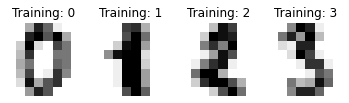

In [6]:
#plot the data, which is just the images flattened into a 1-d array
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

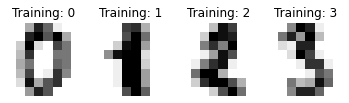

In [7]:
#the images are also included in the dataset as digits.images
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

In [8]:
#from here we will be using the images. First we should flatten the images
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))

Before apply a classifier to the data, let's split the data into a training set and a test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,digits.target)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


At this point we are ready to train a machine learning classifier on the training data. For this first attempt we will be using the support vector machine classifer. For a decription on SVM: http://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html and http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf and https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/

In [10]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(gamma=0.001)

In [11]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

Now to compare the predicted values against the expected values of the test dataset using sklearn metrics.classification

In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        44
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        45
           9       1.00      0.98      0.99        43

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450




**precision** is the fraction of relevant instances among the retrieved instances and is defined as:

precision = tp / (tp + fp)  or (true positives)/(prediced positives)

**recall** is the fraction of relevant instances that have been retrieved over total relevant instances in the image, and is defined as 

recall = tp / (tp + fn) or (true positives)/(actual positives)

Where, tp = true positives, fp = false positives anf fn = false negatives. Recall in this context is also referred to as the true positive rate or sensitivity, and precision is also referred to as positive predictive value (PPV). 

**f1-score**: is a measure of a test's accuracy. It considers both the precision and the recall to compute the score. The f1-score can be interpreted as a weighted average of the precision and recall, where an f1-score reaches its best value at 1 and worst at 0. 

The general formula is: 2.(precision.recall)/(precision+recall) 

The f1-score regulates bot precision and recall. 

References:
https://en.wikipedia.org/wiki/Precision_and_recall

https://en.wikipedia.org/wiki/F1_score

Lecture 11 of Andrew Ng's coursera course (week 6)

In [13]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0  1  0 42]]


The confuson matrix for only one class, e.g. 1 = detections 0 = non-detections

<pre>
         Actual Class
         |  1 | 0  |
         |----|----|
Pred   1 | tp | fp |
Class ---|----|----|
       0 | fn | tn |

</pre>

Thus for 3 classes (1, 2, 3) it is e.g. 1 = cats, 2 = dogs, 3 = bears

<pre>
         Actual Class
         |  1 | 2  | 3  |
         |----|----|----|
Pred   1 | tp | f1 | f1 |  where f1 = false "1", f2 = false "2" and f3 = false "3"
Class ---|----|----|----|
       2 | f2 | tp | f2 |
      ---|----|----|----|
       3 | f3 | f3 | tp |
</pre>

Thus the diagonal in the above matrix shows the number of true positives for each class, while the off-diagonals are the number of elements the particular class has been misclassified (false positives)??


**We have successfully trained our SVM classifier to detect handwritten images of digits. What next:**
1. try different classifiers e.e. k-nearest neighbors, random forest, convolution neural networks 
2. apply to different image classification problems. See Kaggle or openML (https://www.openml.org/guide#!intro) for more datasets